In [4]:
import cPickle
import numpy as np
import scipy
import sklearn.linear_model
import matplotlib.pyplot as plt
from IPython.display import display, Image
from scipy import ndimage

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.17.


In [7]:
with open("F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\mnist.pkl",'rb') as mnist_file:
    train_data,valid_data,test_data = cPickle.load(mnist_file)

8


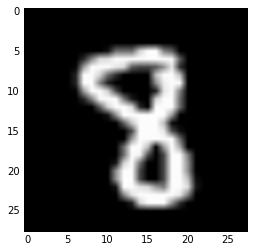

In [8]:
## In this block we are shuffling the data to avoid any classification bias
train_vec_in,train_label_out = train_data
permutation = np.random.permutation(train_vec_in.shape[0])
train_vec_in = train_vec_in[permutation,:]
train_reshape = np.reshape(train_vec_in,newshape=[50000,28,28])
train_label_out = train_label_out[permutation]

plt.imshow(train_reshape[2],cmap='gray')
print(train_label_out[2])

In [9]:
valid_features,valid_labels = valid_data
test_features,test_labels = test_data

In [10]:
## Sklearn Linear Model Logistic Regression
logistic_model = sklearn.linear_model.LogisticRegression(penalty='l2',tol=0.0001,max_iter=100,solver='lbfgs',multi_class='multinomial')
model = logistic_model.fit(train_vec_in,train_label_out)

In [11]:
print np.mean(train_vec_in)
print np.std(train_vec_in)

0.130449
0.30729


In [12]:
''' Sklearn linear Model logistic regression.
Here feature scaling is done on the data as preprocessing.'''
def feature_scaling(dataset):
    std = np.std(dataset,axis=0)
    ind = np.where(std == 0)
    std[ind] = 1
    return (dataset-np.mean(dataset,axis=0))/std

train_scaled_features = feature_scaling(train_vec_in)
valid_scaled_features = feature_scaling(valid_features)
test_scaled_features = feature_scaling(test_features)
logistic_scaled_model = sklearn.linear_model.LogisticRegression(penalty='l2',tol=0.0001,max_iter=100,solver='lbfgs' \
                                                                ,multi_class='multinomial')
model_pre_processed = logistic_scaled_model.fit(train_scaled_features,train_label_out)

In [13]:
print np.mean(train_scaled_features)
print np.std(train_scaled_features)

5.81936e-10
0.956339


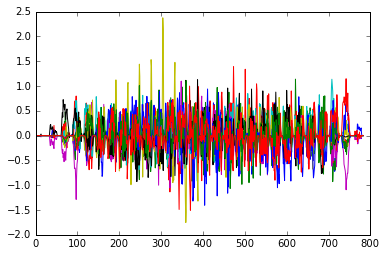

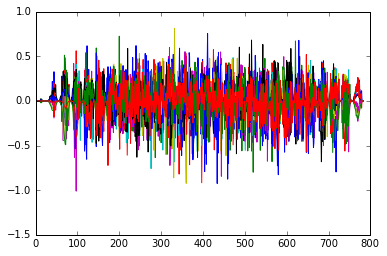

In [14]:
plt.plot(model.coef_.T)
plt.show()
plt.plot(model_pre_processed.coef_.T)
plt.show()

In [15]:
def compute_accuracy(model,features,output_labels):
    ''' model = sklearn Logistic Regression Model
        features = (num_features,num_inputs)
        prediction_dot_product = (num_classes,num_inputs)
        Thus, we have to find the index of the class with maximum score in axis=0
        '''
    features_dim= np.shape(features)
    prediction = model.predict(features)
    accuracy = (prediction==output_labels)
    return np.sum(accuracy,dtype='float32')*100/features_dim[0]

In [16]:
print "Accuracy on Training Set is {}%".format(compute_accuracy(model,train_vec_in,train_label_out))
print "Accuracy on Validation Set is {}%".format(compute_accuracy(model,valid_features,valid_labels))
print "Accuracy on Test Set is {}%".format(compute_accuracy(model,test_features,test_labels))

Accuracy on Training Set is 93.452%
Accuracy on Validation Set is 92.88%
Accuracy on Test Set is 92.56%


In [17]:
## Accuracy over pre processed data
print "Accuracy on Training Set is {}%".format(compute_accuracy(model_pre_processed,train_scaled_features,train_label_out))
print "Accuracy on Validation Set is {}%".format(compute_accuracy(model_pre_processed,valid_scaled_features,valid_labels))
print "Accuracy on Test Set is {}%".format(compute_accuracy(model_pre_processed,test_scaled_features,test_labels))

Accuracy on Training Set is 94.37%
Accuracy on Validation Set is 92.32%
Accuracy on Test Set is 92.19%


In [18]:
## In this we measure the accuracy on normalized datasets using model trained on original data set
print "Accuracy on Training Set is {}%".format(compute_accuracy(model_pre_processed,train_vec_in,train_label_out))
print "Accuracy on Validation Set is {}%".format(compute_accuracy(model_pre_processed,valid_features,valid_labels))
print "Accuracy on Test Set is {}%".format(compute_accuracy(model_pre_processed,test_features,test_labels))

Accuracy on Training Set is 27.718%
Accuracy on Validation Set is 28.59%
Accuracy on Test Set is 28.57%


In [19]:
## In this we measure the accuracy on original datasets using model trained on normalized data set
print "Accuracy on Training Set is {}%".format(compute_accuracy(model,train_scaled_features,train_label_out))
print "Accuracy on Validation Set is {}%".format(compute_accuracy(model,valid_scaled_features,valid_labels))
print "Accuracy on Test Set is {}%".format(compute_accuracy(model,test_scaled_features,test_labels))

Accuracy on Training Set is 77.442%
Accuracy on Validation Set is 78.1%
Accuracy on Test Set is 77.11%


## Stochastic Gradient Descent
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [75]:
sklearn.linear_model.SGDClassifier??

In [20]:
''' SGD Classifier. 
The n_iter parameter has been varied from 1-20, in the intervals of 5 and I have observed that on this particular data set
the n_iter = 10 predicts data sets with better accuracy compared with others'''
clf = sklearn.linear_model.SGDClassifier(loss='log',penalty='l2',fit_intercept=True,n_iter=10,shuffle=True)
model_sgd = clf.fit(train_vec_in,train_label_out)
#valid_prediction_sgd = model.predict(valid_features)


In [21]:
print "SGD Accuracy on Training Set is {}%".format(compute_accuracy(model_sgd,train_vec_in,train_label_out))
print "SGD Accuracy on Validation Set is {}%".format(compute_accuracy(model_sgd,valid_features,valid_labels))
print "SGD Accuracy on Test Set is {}%".format(compute_accuracy(model_sgd,test_features,test_labels))
#plt.plot(model_sgd.coef_.T)
#plt.show()

SGD Accuracy on Training Set is 91.576%
SGD Accuracy on Validation Set is 91.72%
SGD Accuracy on Test Set is 91.14%


In [22]:
## model training using feature noralization
clf_scaled = sklearn.linear_model.SGDClassifier(loss='log',penalty='l2',fit_intercept=True,n_iter=10,shuffle=True)
model_sgd_preprocessed = clf_scaled.fit(train_scaled_features,train_label_out)

In [23]:
## Accuracy of model trainined on normalized feature set

print "SGD Accuracy on Training Set is {}%".format(compute_accuracy(model_sgd_preprocessed,train_scaled_features,train_label_out))
print "SGD Accuracy on Validation Set is {}%".format(compute_accuracy(model_sgd_preprocessed,valid_scaled_features,valid_labels))
print "SGD Accuracy on Test Set is {}%".format(compute_accuracy(model_sgd_preprocessed,test_scaled_features,test_labels))

SGD Accuracy on Training Set is 91.678%
SGD Accuracy on Validation Set is 91.95%
SGD Accuracy on Test Set is 91.34%


In [24]:
## In this we measure the accuracy on normalized datasets using model trained on original data set
print "SGD Accuracy on Training Set is {}%".format(compute_accuracy(model_sgd_preprocessed,train_vec_in,train_label_out))
print "SGD Accuracy on Validation Set is {}%".format(compute_accuracy(model_sgd_preprocessed,valid_features,valid_labels))
print "SGD Accuracy on Test Set is {}%".format(compute_accuracy(model_sgd_preprocessed,test_features,test_labels))

SGD Accuracy on Training Set is 34.322%
SGD Accuracy on Validation Set is 36.33%
SGD Accuracy on Test Set is 35.42%


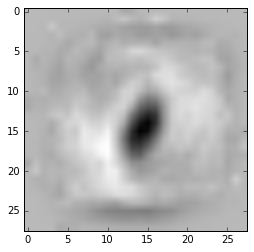

In [25]:
coeff = model_sgd_preprocessed.coef_
plt.imshow(np.reshape(coeff[0,:],newshape=[28,28]),cmap='gray')
plt.show()

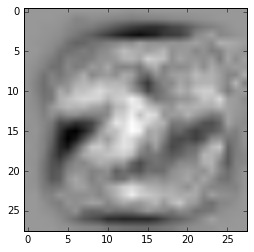

In [119]:
plt.imshow(np.reshape(coeff[8,:],newshape=[28,28]),cmap='gray')

## Softmax Classifier over CIFAR-10 dataset

In [28]:
i=1
cifar_data = np.empty(shape=(10000,3072),dtype='uint8')
labels = np.empty(shape=(10000,),dtype='int32')
while i<=1:
    with open(str.format("F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_{0}",i), \
                                              'rb') as cifar_batch:
            print(cifar_batch.name)
            batch_dict = cPickle.load(cifar_batch)
            cifar_data[(i-1)*10000:i*10000] = batch_dict[b'data'].astype('float32')
            labels[(i-1)*10000:i*10000] = batch_dict[b'labels']
    i += 1
    
cifar_data = (cifar_data.astype('float32'))/255
print(np.shape(cifar_data))
print(cifar_data.dtype)
print(np.shape(labels))
print(labels.dtype)

F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_1
(10000L, 3072L)
float32
(10000L,)
int32


(10000L, 32L, 32L, 3L)


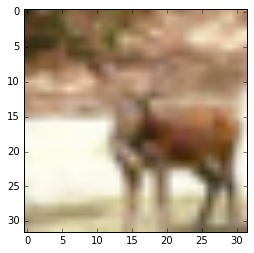

4


In [41]:
image_features_reshaped =  np.reshape(cifar_data,newshape=(10000,3,32,32),order='C').transpose([0,2,3,1])
print np.shape(image_features_reshaped)
plt.imshow(image_features_reshaped[1001,:,:,:])
plt.show()
print labels[1001]

In [48]:
print np.shape(image_features_reshaped)

(10000L, 32L, 32L, 3L)


In [50]:
logistic_model_cifar = sklearn.linear_model.LogisticRegression(penalty='l2',tol=0.0001,max_iter=1000,solver='lbfgs' \
                                                                ,multi_class='multinomial')

model_cifar = logistic_model_cifar.fit(cifar_data,labels)
print "Accuracy on Training Set is {}%".format(compute_accuracy(model_cifar,cifar_data,labels))

Accuracy on Training Set is 67.88%


In [47]:
cifar_predictions = model_cifar.predict(cifar_data)
print cifar_predictions[0:100]
print labels[0:100]

[6 1 9 6 8 7 2 7 8 7 4 7 7 5 9 0 9 5 2 6 0 3 6 6 2 6 9 0 4 0 0 9 1 3 4 7 0
 7 8 3 0 2 2 7 1 1 1 1 2 0 9 5 6 6 2 2 5 6 2 8 1 1 8 2 1 1 4 9 7 0 2 7 9 3
 3 1 9 1 3 1 0 5 4 8 7 7 4 7 9 2 2 3 8 0 1 6 1 1 4 1]
[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0 0 9 1 3 4 0 3
 7 3 3 5 2 2 7 1 1 1 2 2 0 9 5 7 9 2 2 5 2 4 3 1 1 8 2 1 1 4 9 7 8 5 9 6 7
 3 1 9 0 3 1 3 5 4 5 7 7 4 7 9 4 2 3 8 0 1 6 1 1 4 1]



## Some steps for identifying misclassification stimulus

In [82]:
i=1
ind = []
ind.append(0)
while True:
    if train_label_out[i] not in train_label_out[ind]:
        ind.append(i)
    i = i+1   
    if len(ind) == 10:
        break

In [83]:
train_unique = train_vec_in[ind]
train_reshape = np.reshape(train_unique,newshape=[10,28,28])
# for item in train_reshape:
#    plt.imshow(item,cmap='gray')
#    plt.show()

"for item in train_reshape:\n    plt.imshow(item,cmap='gray')\n    plt.show()"